In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tarfile
tar = tarfile.open("/content/drive/My Drive/Colab Notebooks/CINIC-10.tar.gz")
tar.extractall()
tar.close()

In [0]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import torch.nn   
import torch.optim as optim
import torch.nn.functional 
import torchvision.datasets   
import torchvision.transforms     

import matplotlib
matplotlib.use('Agg')       
get_ipython().magic('matplotlib inline')
from matplotlib import pyplot    
from matplotlib.pyplot import subplot    
import sklearn.metrics as metrics 
from sklearn.metrics import accuracy_score

In [0]:
!pip install Augmentor

In [0]:
import Augmentor
p = Augmentor.Pipeline("/content/train")

Initialised with 90000 image(s) found.
Output directory set to /content/train/output.

In [0]:
p.crop_centre(0.5,0.9)
p.flip_left_right(0.5)
p.scale(0.5,1.1)
p.zoom(0.5,1.1,1.3)
p.random_brightness(0.2,0.3,0.7)
p.resize(1,32,32)

In [0]:
p.sample(40000)

Processing <PIL.Image.Image image mode=RGB size=32x32 at 0x7F732048DBA8>: 100%|██████████| 40000/40000 [02:41<00:00, 247.42 Samples/s]


In [0]:
TRAIN_DATA_PATH="/content/train"
transfm=[transforms.CenterCrop(32*0.9)]
data_valid_transform = transforms.Compose([ transforms.ToTensor(),transforms.Normalize((0.4598, 0.4520, 0.4116),(0.1902, 0.1869, 0.1896))])
train = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=data_valid_transform)
VLAID_DATA_PATH="/content/valid"
valid = torchvision.datasets.ImageFolder(root=VLAID_DATA_PATH, transform=data_valid_transform)
TEST_DATA_PATH="/content/test"
test = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=data_valid_transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True, num_workers=6)  
valid_loader = torch.utils.data.DataLoader(valid, batch_size=128, num_workers=6)    
test_loader = torch.utils.data.DataLoader(test,  batch_size=1, num_workers=6)       

In [0]:
mean = 0.
std = 0.
nb_samples = 0.
for data, labels in train_loader:
    data=torch.tensor(data)
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [0]:
std

tensor([1.0506, 1.0511, 1.0531])

In [0]:
from distutils.dir_util import copy_tree

# copy subdirectory example
fromDirectory = "/content/train/output/truck"
toDirectory = "/content/train/truck"

copy_tree(fromDirectory, toDirectory)

['/content/train/truck/truck_original_n02871314_5866.png_6066fc73-08e9-4aa5-82d8-92f955d4fbf4.png',
 '/content/train/truck/truck_original_cifar10-train-39879.png_063fe96f-2abc-401b-97ac-5ac465736f7a.png',
 '/content/train/truck/truck_original_n03256166_7427.png_6245b0a1-087c-4b41-8d52-7b3d0672e18e.png',
 '/content/train/truck/truck_original_n04465666_8669.png_91be44d4-33fd-4065-9cc5-7b1c151b8248.png',
 '/content/train/truck/truck_original_n03930630_677.png_9b4a4ff3-6f2a-44bd-bfdb-1943105c60bb.png',
 '/content/train/truck/truck_original_n04467665_71480.png_75c22471-5959-4deb-9c7a-31c1b17c6b56.png',
 '/content/train/truck/truck_original_n03632852_7346.png_7a17c975-b004-4079-a60e-b402d4e55d61.png',
 '/content/train/truck/truck_original_n04474035_11024.png_aecf66db-c6e0-4ee4-981c-fe24f4e3b4b7.png',
 '/content/train/truck/truck_original_n04461696_4100.png_e16c7984-54bb-4269-9b38-ea692b9072ee.png',
 '/content/train/truck/truck_original_n03345487_12458.png_6cc3c658-ab81-4e3a-ba56-affb6773428f

In [0]:
!rm -rf /content/train/output

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.bn1= nn.BatchNorm2d(num_features=32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.conv2 = nn.Conv2d(32, 64, 4)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.bn2= nn.BatchNorm2d(num_features=64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        #self.conv3 = nn.Conv2d(32, 16, 2)
        #self.pool3 = nn.MaxPool2d(2, 2)
        #self.bn3= nn.BatchNorm2d(num_features=16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        self.fc1 = nn.Linear(64*6*6, 600)
        self.fc2 = nn.Linear(600, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(x.shape)
        x=self.bn1(x)
        #print(x.shape)
        x = self.pool2(F.relu(self.conv2(x)))
        #print(x.shape)
        x=self.bn2(x)
        #print(x.shape)
        #x = self.pool3(F.relu(self.conv3(x)))
        #x=self.bn3(x)
        x = x.view(-1, 64*6*6)
        nn.Dropout(0.5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x= F.log_softmax(self.fc3(x))
        return x


net = Net()



In [0]:
net

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

In [0]:
def init_weights(m):
    if type(m) == nn.Linear:
      torch.nn.init.xavier_uniform_(m.weight)
      torch.nn.init.constant(m.bias, 0)
    if isinstance(m, nn.Conv2d):
      torch.nn.init.xavier_uniform_(m.weight)
      torch.nn.init.constant(m.bias, 0)
net.apply(init_weights)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  after removing the cwd from sys.path.


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1152, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

True
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


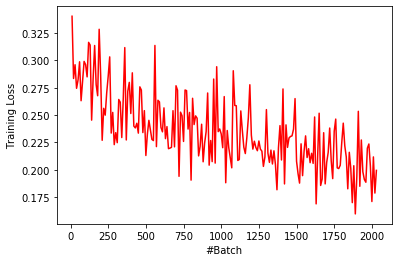

Training:::for epoch 0 accuracy is: 0.9561315821850394


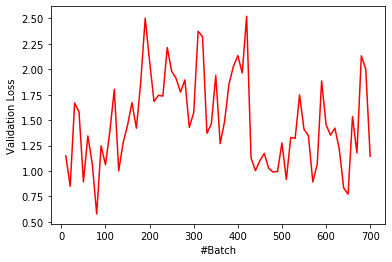

0.6466175426136364
Validation:::for epoch 0 accuracy is: 0.6466175426136364


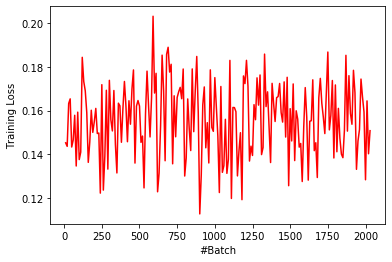

Training:::for epoch 1 accuracy is: 0.9727254552165354


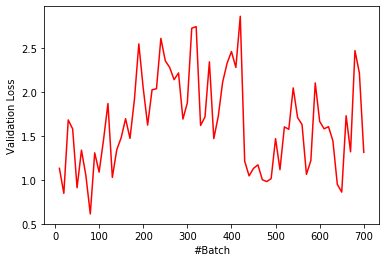

-0.004183682528409061
Validation:::for epoch 1 accuracy is: 0.6424338600852273
2 2


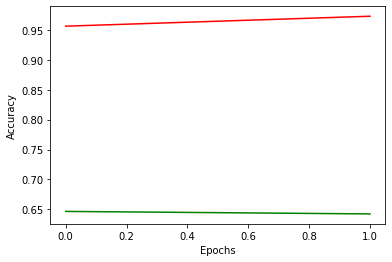

Classifier Accuracy:  64.37544389204545


In [0]:
import torch
from torch.utils import data


# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(torch.cuda.is_available())
#cudnn.benchmark = True
print(torch.cuda.current_device())

def imshow(img):
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



# Generators
#training_set = Dataset(finalTrainData, finalTrainDataLabel)
#training_generator = data.DataLoader(training_set, **params)

#validation_set = Dataset(finalValidData, finalValidDataLabel)
#validation_generator = data.DataLoader(validation_set, **params)

# Loop over epochs
#net = LeNet5()
net.cuda()
max_epochs=2
criterion = nn.CrossEntropyLoss()
learning_rate=0.0001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
training_accuracy=[]
validation_accuracy=[]
prev_accuracy=0.0
curr_accuracy=0.0
epoch_count=0
for epoch in range(max_epochs):
    epoch_count+=1
    # Training
    #print(epoch)
    loss_list=[]
    num_batch_list=[]
    num_batches=0
    final_loss=[]
    net.train()
    for local_batch, local_labels in train_loader:
      # Transfer to GPU
      #imshow(torchvision.utils.make_grid(local_batch))
      local_batch, local_labels =  torch.autograd.Variable(local_batch.cuda()), torch.autograd.Variable(local_labels.cuda())     
      output = net(local_batch)
      loss = criterion(output, local_labels)
      loss_list.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      num_batches+=1
      if num_batches % 10 == 0:
            num_batch_list.append(num_batches)
            final_loss.append(np.mean(loss_list))
            loss_list.clear()
    # plotting training and validation accuracies
    fig2 = pyplot.figure()
    pyplot.plot(num_batch_list, final_loss, 'r')
    pyplot.xlabel("#Batch")
    pyplot.ylabel("Training Loss") 
    pyplot.show(fig2) 


    accuracy=0.0
    num_batches=0
    
    net.eval()
    for local_batch, local_labels in train_loader:
      # Transfer to GPU
      local_batch=  torch.autograd.Variable(local_batch.cuda())

      # Model computations
      predicted_val = net(local_batch)

      predicted_val = predicted_val.cpu().data.numpy()
      predicted_val = np.argmax(predicted_val, axis = 1)  # retrieved max_values along every row    
      # accuracy        
      current_accuracy=accuracy_score(local_labels.numpy(), predicted_val)
      accuracy += current_accuracy
      num_batches +=1
      #print("accuracy for batch ", num_batches,accuracy)
    training_accuracy.append(accuracy/num_batches)  
    print("Training:::for epoch", epoch, "accuracy is:",accuracy/num_batches)

    # Validation
    accuracy=0.0
    num_batch_list=[]
    num_batches=0
    final_loss=[]
    loss_list=[]
    net.eval()
    for local_batch, local_labels in valid_loader:
      # Transfer to GPU
      local_batch=  torch.autograd.Variable(local_batch.cuda())

      # Model computations
      predicted_val = net(local_batch)
      loss = criterion(predicted_val, torch.autograd.Variable(local_labels.cuda()))
      loss_list.append(loss.item())
      #print(predicted_val) 
      #loss = criterion(output, local_labels)
      predicted_val = predicted_val.cpu().data.numpy()
      predicted_val = np.argmax(predicted_val, axis = 1)  # retrieved max_values along every row    
      # accuracy        
      current_accuracy=accuracy_score(local_labels.numpy(), predicted_val)
      accuracy += current_accuracy
      #print(current_accuracy)
      num_batches +=1
      if num_batches % 10 == 0:
            num_batch_list.append(num_batches)
            final_loss.append(np.mean(loss_list))
            loss_list.clear()
    # plotting training and validation accuracies
    fig2 = pyplot.figure()
    pyplot.plot(num_batch_list, final_loss, 'r')
    pyplot.xlabel("#Batch")
    pyplot.ylabel("Validation Loss") 
    pyplot.show(fig2) 
      #print("accuracy for batch ", num_batches,accuracy)
    curr_accuracy=accuracy/num_batches
    validation_accuracy.append(curr_accuracy) 
    print(curr_accuracy-prev_accuracy)
    if 2 <0.00000001:
      max_epochs=epoch_count
      break
    else:
      prev_accuracy=curr_accuracy
    print("Validation:::for epoch", epoch, "accuracy is:",accuracy/num_batches)

epochs = list(range(max_epochs))

# plotting training and validation accuracies
print(len(epochs), len(training_accuracy))
fig2 = pyplot.figure()
pyplot.plot(epochs, training_accuracy, 'r')
pyplot.plot(epochs, validation_accuracy, 'g')
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy") 
pyplot.show(fig2) 


# In[14]:


# test the model on test dataset
correct = 0
total = 0
accuracy=0.0
predicted_values=[]
real_values=[]
net.eval()
for inputs, actual_val in test_loader:
    total += 1
    #inputs, actual_val = test_data 
    # perform classification
    predicted_val = net(torch.autograd.Variable(inputs.cuda()))    
    # convert 'predicted_val' GPU tensor to CPU tensor and extract the column with max_score
    predicted_val = predicted_val.cpu().data.numpy()
    predicted_val = np.argmax(predicted_val, axis = 1)  # retrieved max_values along every row    
    # accuracy     
    predicted_values.extend(predicted_val)   
    real_values.extend(actual_val.numpy())
    current_accuracy=accuracy_score(actual_val.numpy(), predicted_val)
    accuracy += current_accuracy
       
print("Classifier Accuracy: ", accuracy/total * 100)


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:211: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


/content/test/dog/n02109047_9479.png
torch.Size([1, 3, 32, 32])
[4] 5
/content/test/dog/n02109150_1051.png
torch.Size([1, 3, 32, 32])
[2] 5
/content/test/dog/n02109150_1222.png
torch.Size([1, 3, 32, 32])
[2] 5
/content/test/dog/n02109150_1423.png
torch.Size([1, 3, 32, 32])
[4] 5
/content/test/dog/n02109150_1641.png
torch.Size([1, 3, 32, 32])
[2] 5
/content/test/dog/n02109150_1757.png
torch.Size([1, 3, 32, 32])
[3] 5
/content/test/dog/n02109150_1769.png
torch.Size([1, 3, 32, 32])
[4] 5
/content/test/dog/n02109150_1792.png
torch.Size([1, 3, 32, 32])
[6] 5
/content/test/dog/n02109150_1839.png
torch.Size([1, 3, 32, 32])
[4] 5
/content/test/dog/n02109150_1953.png
torch.Size([1, 3, 32, 32])
[3] 5
/content/test/dog/n02109150_1983.png
torch.Size([1, 3, 32, 32])
[4] 5
/content/test/dog/n02109150_2042.png
torch.Size([1, 3, 32, 32])
[3] 5
/content/test/dog/n02109150_2181.png
torch.Size([1, 3, 32, 32])
[3] 5
/content/test/dog/n02109150_224.png
torch.Size([1, 3, 32, 32])
[4] 5
/content/test/dog/n02

RuntimeError: ignored

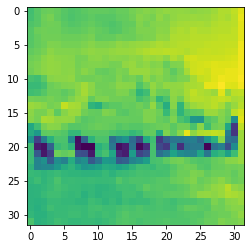

In [0]:
# test the model on test dataset
import PIL
net.cuda()
correct = 0
total = 0
accuracy=0.0
predicted_values=[]
real_values=[]
net.eval()
imsize = 32
loader = transforms.Compose([transforms.Scale(imsize), transforms.ToTensor()])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = PIL.Image.open(image_name)
    pyplot.imshow(image)
    image = loader(image).float()
    image = torch.autograd.Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image.cuda()  #assumes that you're using GPU

for inputs in test.imgs[50000:55000]:
    image = image_loader(inputs[0])
    print(inputs[0])
    actual_val=inputs[1]
    total += 1 
    print(image.shape)
    #if(image.size==torch.Size([1, 3, 32, 32])):
    predicted_val = net(image)    
    # convert 'predicted_val' GPU tensor to CPU tensor and extract the column with max_score
    predicted_val = predicted_val.cpu().data.numpy()
    predicted_val = np.argmax(predicted_val, axis = 1)  # retrieved max_values along every row    
      # accuracy 
    print(predicted_val, actual_val)
    #print(total,predicted_val, actual_val)
    #predicted_values.extend(predicted_val)   
    #real_values.extend(actual_val.numpy())
    #current_accuracy=accuracy_score(actual_val.numpy(), predicted_val)
    #accuracy += current_accuracy
       
print("Classifier Accuracy: ", accuracy/total * 100)

In [0]:
predicted_values[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 2, 0]

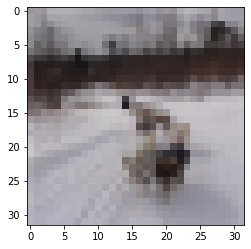

In [0]:
pyplot.imshow(PIL.Image.open("/content/test/dog/n02109811_3269.png"))

In [0]:
correct = 0
total = 0
accuracy=0.0
predicted_values=[]
real_values=[]
net.eval()
for inputs, actual_val in test_loader:
    total += 1
    # perform classification
    predicted_val =net(torch.autograd.Variable(inputs.cuda()))    
    # convert 'predicted_val' GPU tensor to CPU tensor and extract the column with max_score
    predicted_val = predicted_val.cpu().data.numpy()
    predicted_val = np.argmax(predicted_val, axis = 1)  # retrieved max_values along every row     
    predicted_values.extend(predicted_val)   
    real_values.extend(actual_val.numpy())
    current_accuracy=accuracy_score(actual_val.numpy(), predicted_val)
    accuracy += current_accuracy
       
print("Classifier Accuracy on Test Dataset: ", accuracy/total * 100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Classifier Accuracy on Test Dataset:  64.37544389204545


In [0]:
real_values[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:
conf_matrix = metrics.confusion_matrix(predicted_values, real_values)

In [0]:
for i in range(10):
  total=conf_matrix[i].sum()
  print("for i:",train.classes[i], 100*conf_matrix[i][i]/total)
#print(conf_matrix.diag()/conf_matrix.sum(1))

for i: airplane 75.16208361278784
for i: automobile 69.00380710659898
for i: bird 58.743433043851184
for i: cat 48.9022864293027
for i: deer 58.19946839246504
for i: dog 47.29445612482019
for i: frog 74.41835759056625
for i: horse 71.82904411764706
for i: ship 69.75873085821307
for i: truck 69.88134015821312


In [0]:
train.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [0]:
torch.save(net.state_dict(), "/content/drive/My Drive/Colab Notebooks/model64")

In [0]:
net = Net()
net.load_state_dict(torch.load("/content/drive/My Drive/Colab Notebooks/model64"))

<All keys matched successfully>

In [0]:
torch.save("/content/train", "/content/drive/My Drive/Colab Notebooks/model")

In [0]:
net.cuda()
correct = 0
total = 0
accuracy=0.0
for inputs, actual_val in test_loader:
    total += 1
    #inputs, actual_val = test_data 
    # perform classification
    predicted_val = net(torch.autograd.Variable(inputs.cuda()))    
    # convert 'predicted_val' GPU tensor to CPU tensor and extract the column with max_score
    predicted_val = predicted_val.cpu().data.numpy()
    predicted_val = np.argmax(predicted_val, axis = 1)  # retrieved max_values along every row    
    # accuracy        
    current_accuracy=accuracy_score(actual_val.numpy(), predicted_val)
    accuracy += current_accuracy
       
print("Classifier Accuracy: ", accuracy/total * 100)

Preprocess TrainingData by subtracting the means


In [0]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

cur_batch_win = None
cur_batch_win_opts = {
    'title': 'Epoch Loss Trace',
    'xlabel': 'Batch Number',
    'ylabel': 'Loss',
    'width': 1200,
    'height': 600,
}


def train(epoch):
    global cur_batch_win
    #net.forward()
    for i, batch_list in enumerate(train_loader.dataset):
        optimizer.zero_grad()
        #print(batch)
        output = net.forward(torch.Tensor(batch_list[0]))

        loss_list = criterion(output, batch_list[1])

        if i % 10 == 0:
            print('Train - Epoch %d, Batch: %d, Loss: %f' % (epoch, i, loss.detach().cpu().item()))

        # Update Visualization
        if viz.check_connection():
            cur_batch_win = viz.line(torch.Tensor(loss_list), torch.Tensor(batch_list),
                                     win=cur_batch_win, name='current_batch_loss',
                                     update=(None if cur_batch_win is None else 'replace'),
                                     opts=cur_batch_win_opts)

        loss.backward()
        optimizer.step()


def test():
    net.eval()
    total_correct = 0
    avg_loss = 0.0
    for i, (images, labels) in enumerate(test_loader):
        output = net(images)
        avg_loss += criterion(output, labels).sum()
        pred = output.detach().max(1)[1]
        total_correct += pred.eq(labels.view_as(pred)).sum()

    avg_loss /= len(test_loader)
    print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss.detach().cpu().item(), float(total_correct) / len(data_test)))


def train_and_test(epoch):
    train(epoch)
    test()


for e in range(1, 16):
  train_and_test(e)


# New Section